Using the corpus of inaugural speeches, count the dot product and cosine similarity for texts with and without function words and present the results in the form of a heat map 

In [52]:
# importing libraries
from nltk.corpus import inaugural
from sklearn.feature_extraction.text import CountVectorizer

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
corpus = [inaugural.raw(i) for i in (inaugural.fileids())]

# df with stopwords
vec_sw = CountVectorizer(token_pattern=r"(?u)\b\w+\b")
words_sw = vec_sw.fit_transform(corpus)
df_words_sw = pd.DataFrame(words_sw.T.toarray(), vec_sw.get_feature_names_out())

# df without stopwords
vec = CountVectorizer(token_pattern=r"(?u)\b\w+\b", stop_words = "english")
words = vec.fit_transform(corpus)
df_words = pd.DataFrame(words.T.toarray(), vec.get_feature_names_out())

Heatmaps - dot product

Text(0.5, 1.0, 'Heatmap without stopwords')

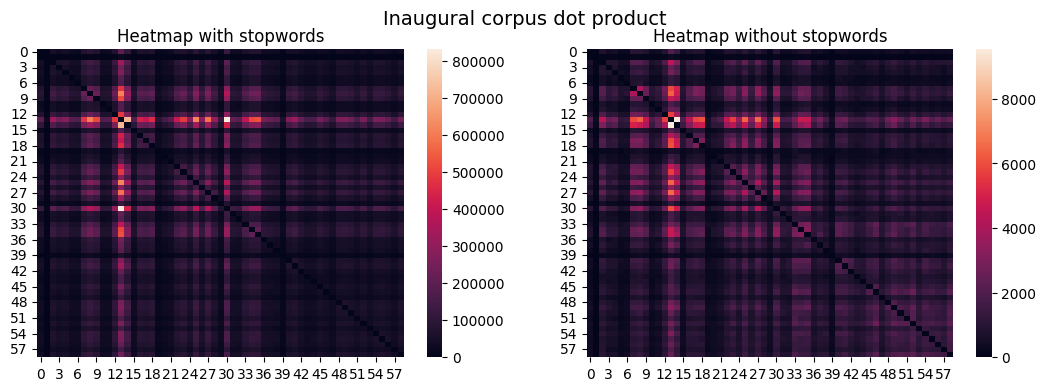

In [54]:
#heatmap with stopwords
mat_sw = df_words_sw.T @ df_words_sw
mat_sw = np.array(mat_sw)
np.fill_diagonal(mat_sw, 0)

#heatmap without stopwords
mat = df_words.T @ df_words
mat = np.array(mat)
np.fill_diagonal(mat, 0)

plt.figure(figsize=(13,4))
plt.suptitle("Inaugural corpus dot product",size=14)
plt.subplot(1,2,1)
sns.heatmap(mat_sw).set_title("Heatmap with stopwords")
plt.subplot(1,2,2)
sns.heatmap(mat).set_title("Heatmap without stopwords")

# The scalar product allows you to check the similarity of two documents. 
# The disadvantage of this method is that it does not take into account the number of words in the text
# For example - on the heatmap without stopwords you can see that documents #13 stand out (probably because of its length)

Index([13], dtype='int64')

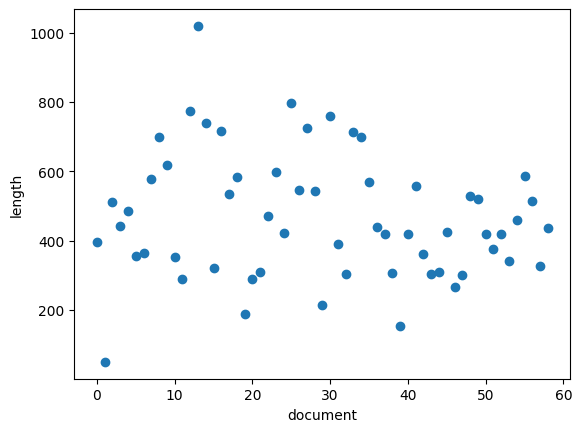

In [55]:
length=(df_words==1).sum()
plt.scatter(length.index,length)
plt.xlabel('document')
plt.ylabel('length')
length[length==max(length)].index

# As speculated - the 13th document stands out because it is the longest

heatmaps - cosine similarity

Text(0.5, 1.0, 'Heatmap without stopwords')

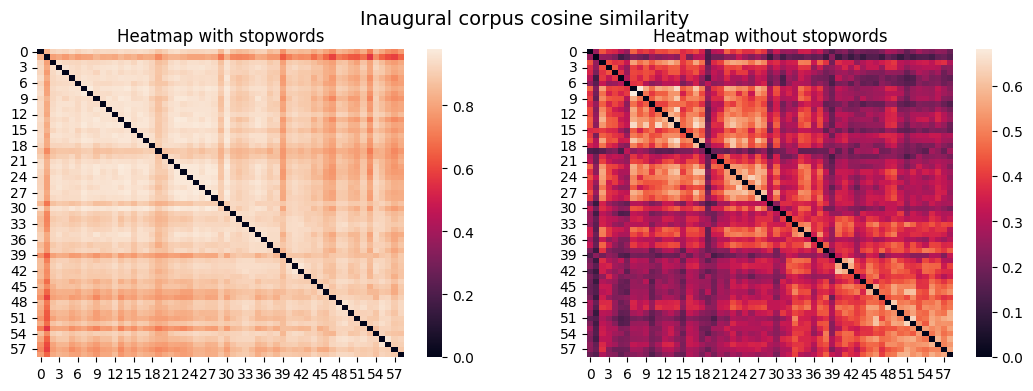

In [56]:
norm = np.linalg.norm(df_words.T, axis=1, keepdims=True)
normalized = df_words.T / norm
cosine_similarity=normalized@normalized.T
mat = np.array(cosine_similarity)
np.fill_diagonal(mat, 0)

norm_sw = np.linalg.norm(df_words_sw.T, axis=1, keepdims=True)
normalized_sw = df_words_sw.T / norm_sw
cosine_similarity_sw=normalized_sw@normalized_sw.T
mat_sw= np.array(cosine_similarity_sw)
np.fill_diagonal(mat_sw, 0)

plt.figure(figsize=(13,4))
plt.suptitle("Inaugural corpus cosine similarity",size=14)
plt.subplot(1,2,1)
sns.heatmap(mat_sw).set_title("Heatmap with stopwords")
plt.subplot(1,2,2)
sns.heatmap(mat).set_title("Heatmap without stopwords")

cosine similarity - scikit-learn function

Text(0.5, 1.0, 'Heatmap without stopwords')

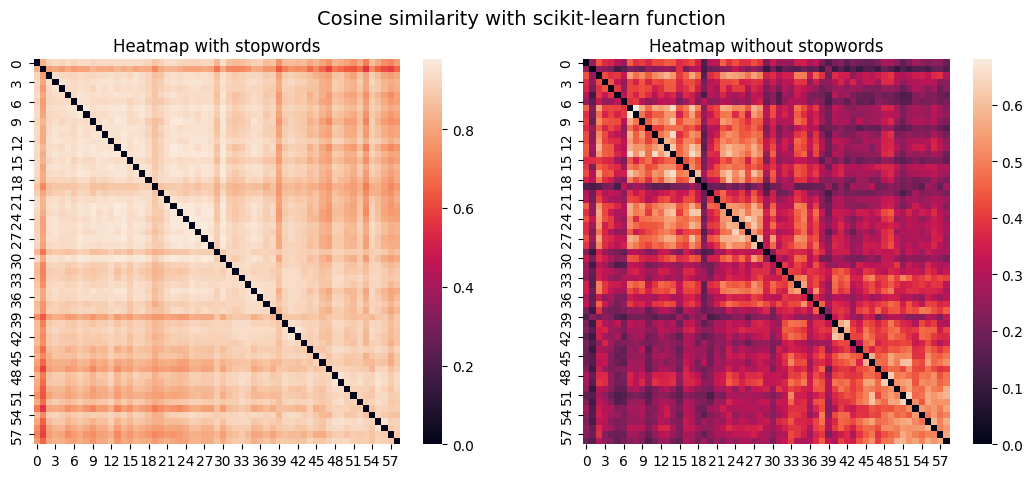

In [57]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim_sw = cosine_similarity(df_words_sw.T, df_words_sw.T)
mat_sw = np.array(cosine_sim_sw)
np.fill_diagonal(mat_sw, 0)
cosine_sim = cosine_similarity(df_words.T, df_words.T)
mat = np.array(cosine_sim)
np.fill_diagonal(mat, 0)

plt.figure(figsize=(13,5))
plt.suptitle("Cosine similarity with scikit-learn function",size=14)
plt.subplot(1,2,1)
sns.heatmap(mat_sw).set_title("Heatmap with stopwords")
plt.subplot(1,2,2)
sns.heatmap(mat).set_title("Heatmap without stopwords")